## Import Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

## Load Data

In [2]:
bank_data=pd.read_csv('../data/bank_data_cleaned.csv')

In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [4]:
bank_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Explore the Data

To facilitate exploration of the data, we divid the features into numeric and categorical features.

In [5]:
categorical_features=['Gender','Education_Level','Marital_Status', 'Income_Category','Card_Category']

In [6]:
numerical_features=[col for col in bank_data.columns if col not in ['Attrition_Flag',categorical_features]]

### Distribution of Categorical Data

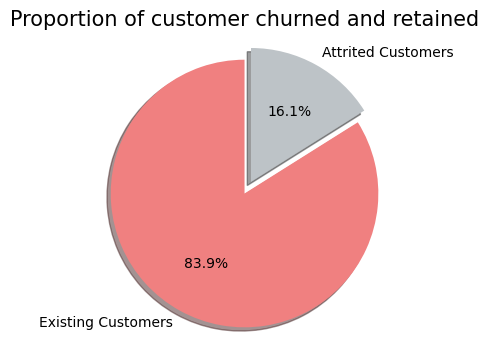

In [18]:
labels = 'Existing Customers', 'Attrited Customers'
sizes = [bank_data.Attrition_Flag[bank_data['Attrition_Flag']=='Existing Customer'].count(), bank_data.Attrition_Flag[bank_data['Attrition_Flag']=='Attrited Customer'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(6, 4))
color=['#F08080','#BDC3C7']
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=color)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 15)
plt.show()

In the fan chart, the percentage of attrited customers is 16.1% and the percentage of existing customers is 83.9%. So, our goal is to predict this 16% of customer churn. This 16% of customers is not a large percentage, but it is important to choose a better model to accurately predict this 16% of customers.

Let's first look at the relationship between the target variable and other categorical variables.

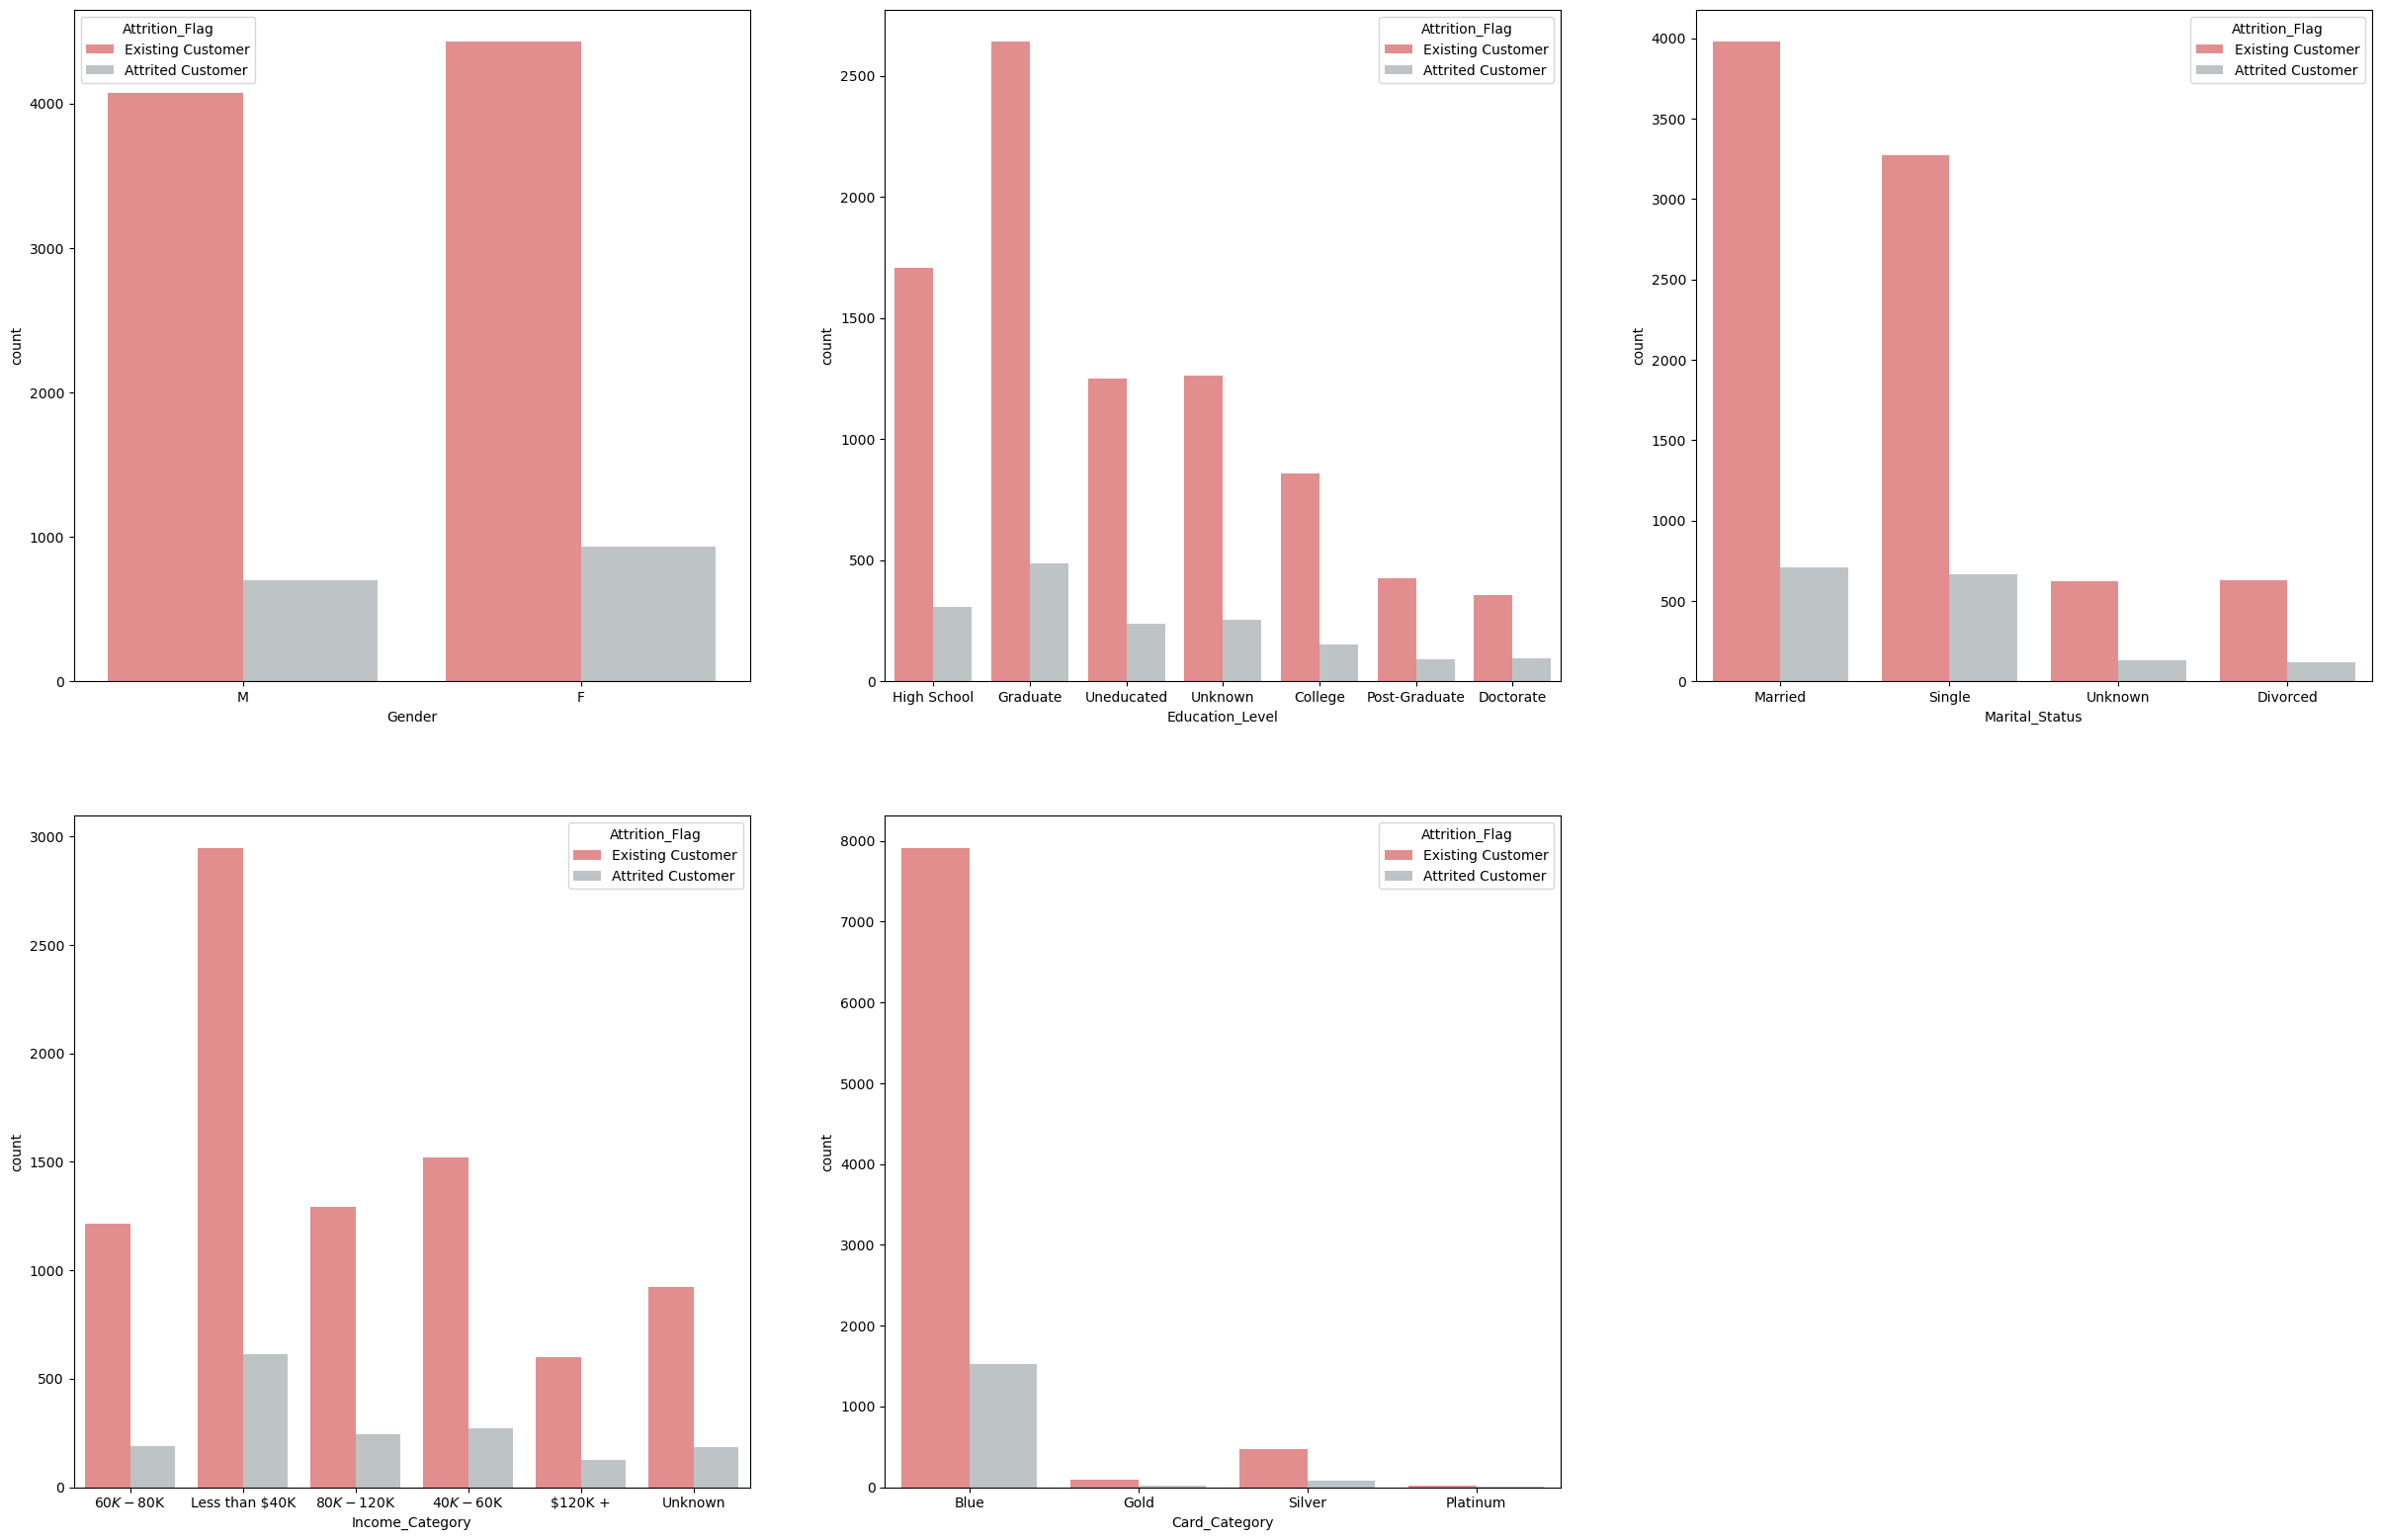

In [23]:
plt.figure(figsize=(30, 30))
plt.subplot(3,3,1)
color=['#F08080','#BDC3C7']
sns.countplot(x='Gender', hue = 'Attrition_Flag',data = bank_data,palette=['#F08080','#BDC3C7'])
plt.subplot(3,3,2)
sns.countplot(x='Education_Level', hue = 'Attrition_Flag',data = bank_data,palette=['#F08080','#BDC3C7'])
plt.subplot(3,3,3)
sns.countplot(x='Marital_Status', hue = 'Attrition_Flag',data = bank_data,palette=['#F08080','#BDC3C7'])
plt.subplot(3,3,4)
sns.countplot(x='Income_Category', hue = 'Attrition_Flag',data = bank_data,palette=['#F08080','#BDC3C7'])
plt.subplot(3,3,5)
sns.countplot(x='Card_Category', hue = 'Attrition_Flag',data = bank_data,palette=['#F08080','#BDC3C7']);



1.The vast majority are blue card customers, slightly more women than men, and half are in marriages.Most of the clients have high school education or above, but most of the clients' income is below 40K.

2.For each categorical variable, the percentage of churned customers is positively correlated with the percentage of retained customers.This may indicate that each categorical variable, gender, education level,martial status, income and card category are not significant factors in determining whether customers will churn.

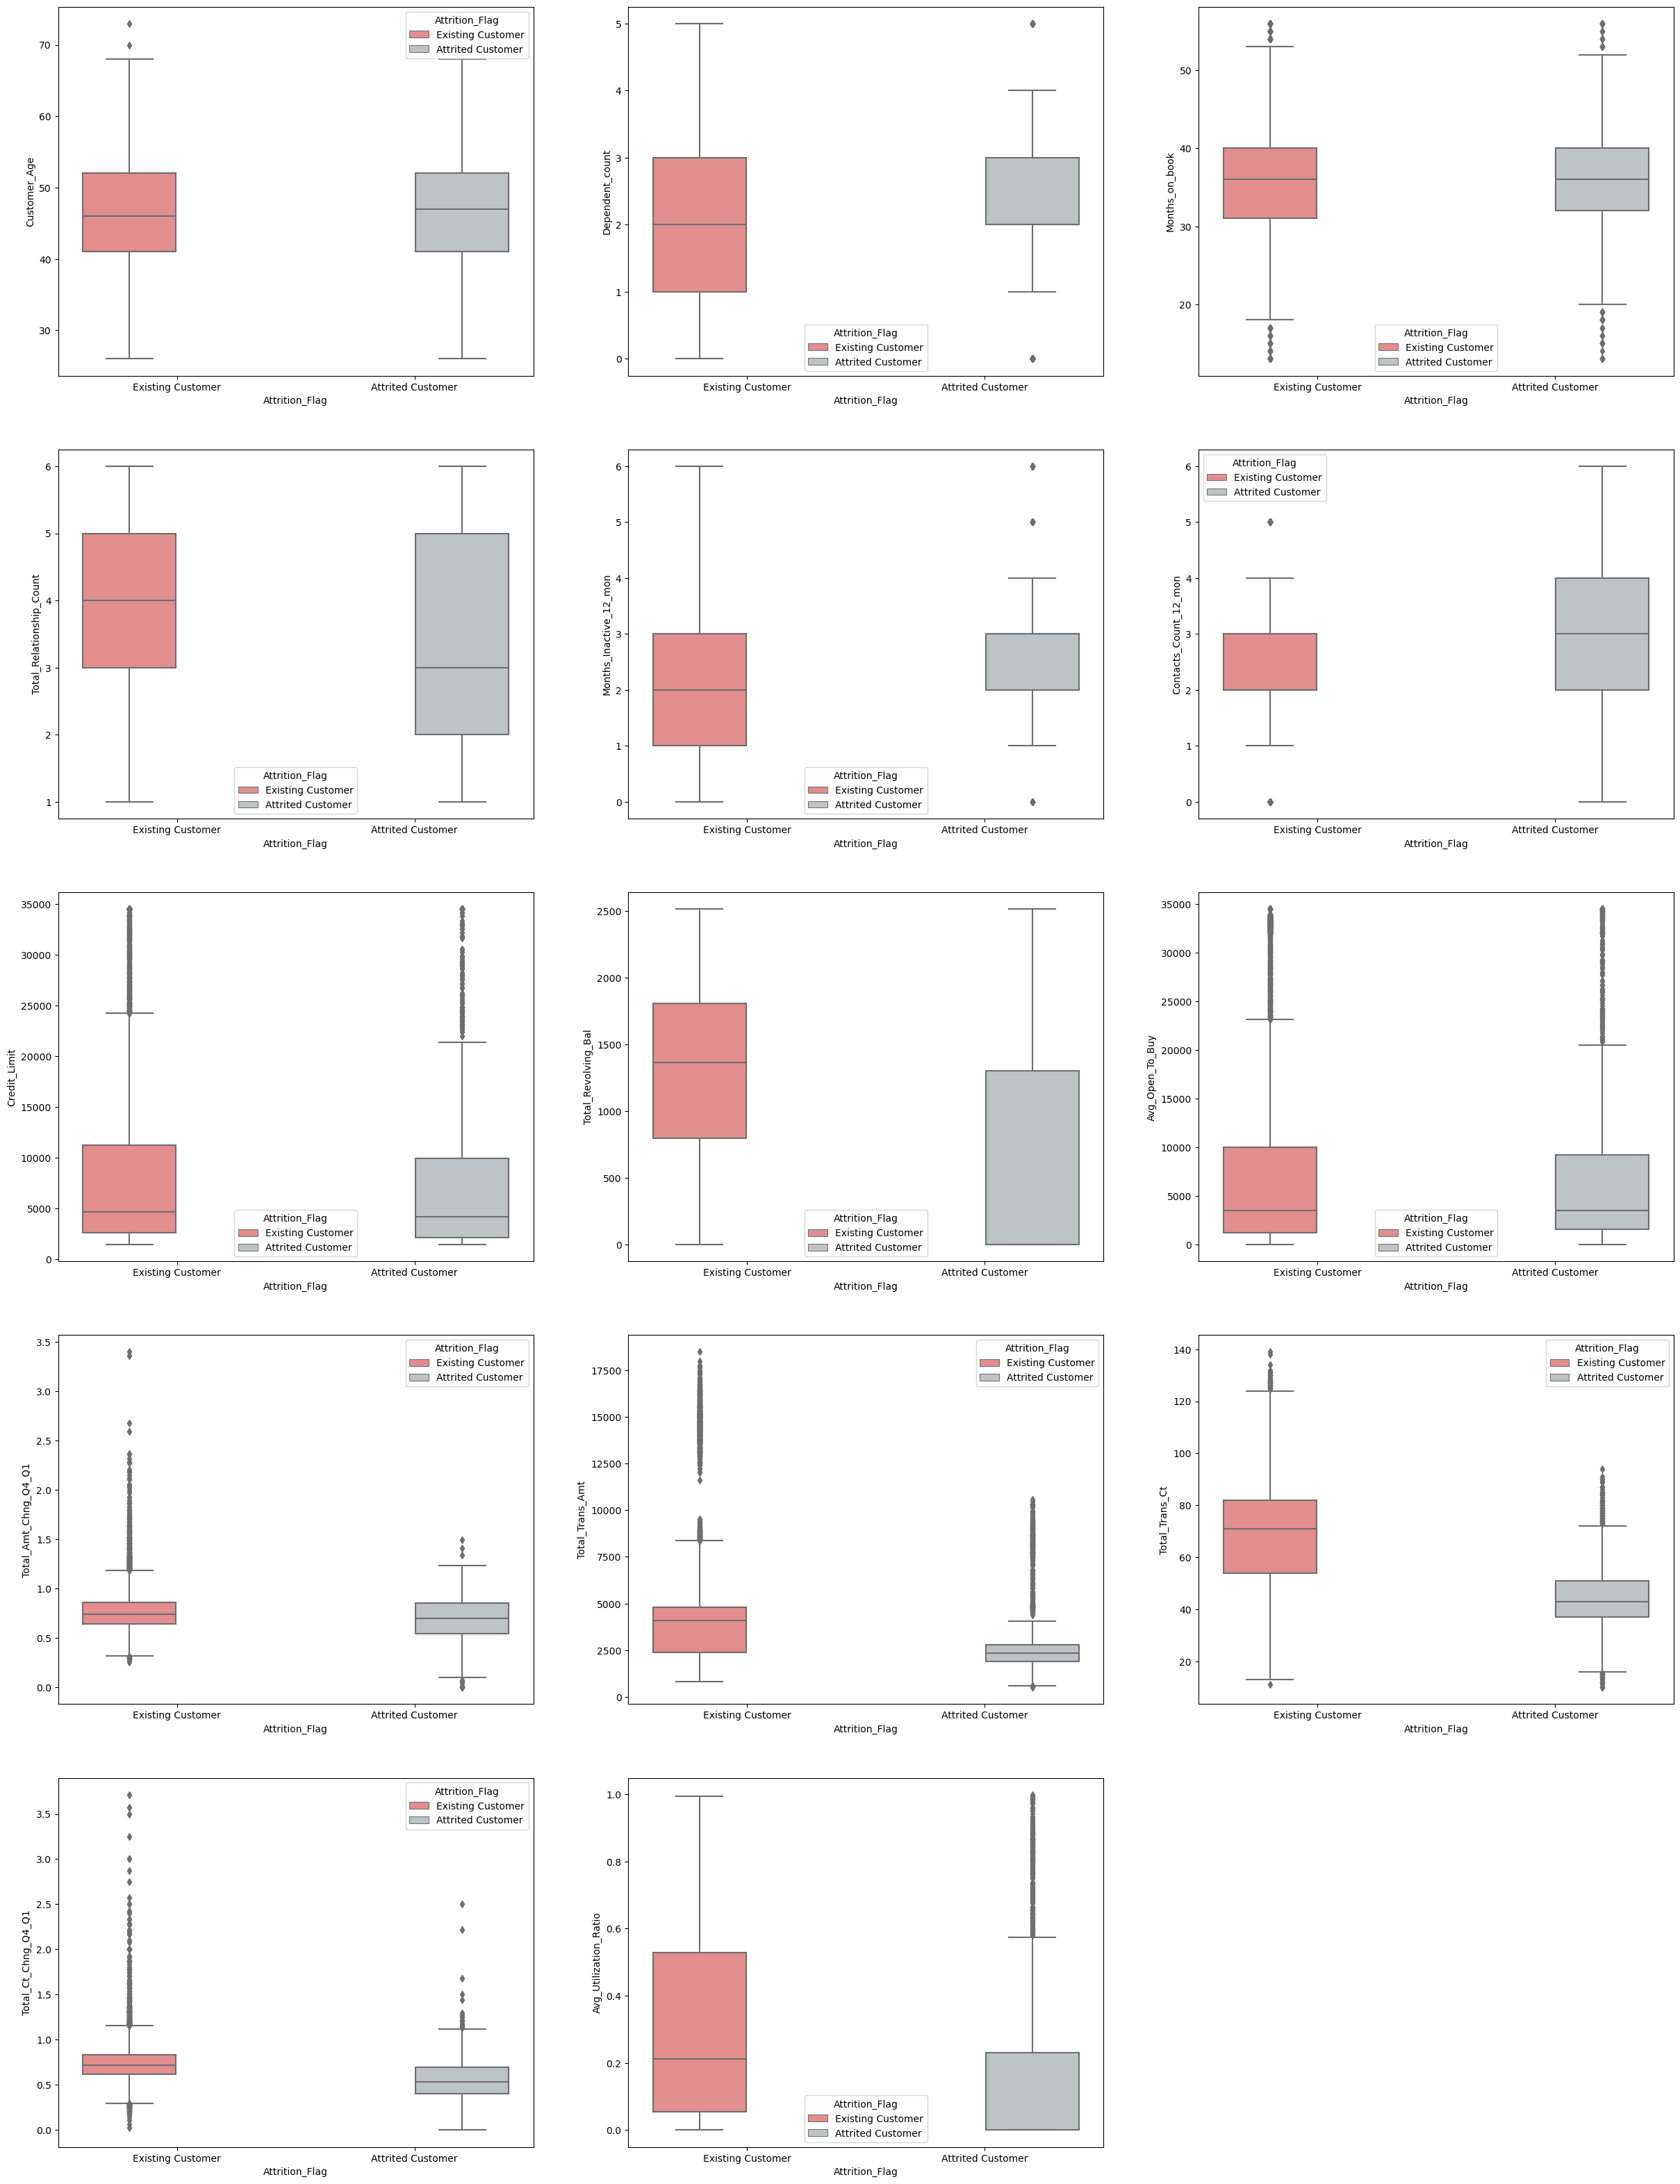

In [24]:
plt.figure(figsize=(30, 40))
plt.subplot(5,3,1)
sns.boxplot(y='Customer_Age',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = bank_data,palette=['#F08080','#BDC3C7'])
plt.subplot(5,3,2)
sns.boxplot(y='Dependent_count',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = bank_data,palette=['#F08080','#BDC3C7'])
plt.subplot(5,3,3)
sns.boxplot(y='Months_on_book',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = bank_data,palette=['#F08080','#BDC3C7'])
plt.subplot(5,3,4)
sns.boxplot(y='Total_Relationship_Count',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = bank_data,palette=['#F08080','#BDC3C7'])
plt.subplot(5,3,5)
sns.boxplot(y='Months_Inactive_12_mon',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = bank_data,palette=['#F08080','#BDC3C7'])
plt.subplot(5,3,6)
sns.boxplot(y='Contacts_Count_12_mon',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = bank_data,palette=['#F08080','#BDC3C7'])
plt.subplot(5,3,7)
sns.boxplot(y='Credit_Limit',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = bank_data,palette=['#F08080','#BDC3C7'])
plt.subplot(5,3,8)
sns.boxplot(y='Total_Revolving_Bal',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = bank_data,palette=['#F08080','#BDC3C7'])
plt.subplot(5,3,9)
sns.boxplot(y='Avg_Open_To_Buy',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = bank_data,palette=['#F08080','#BDC3C7'])
plt.subplot(5,3,10)
sns.boxplot(y='Total_Amt_Chng_Q4_Q1',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = bank_data,palette=['#F08080','#BDC3C7'])
plt.subplot(5,3,11)
sns.boxplot(y='Total_Trans_Amt',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = bank_data,palette=['#F08080','#BDC3C7'])
plt.subplot(5,3,12)
sns.boxplot(y='Total_Trans_Ct',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = bank_data,palette=['#F08080','#BDC3C7'])
plt.subplot(5,3,13)
sns.boxplot(y='Total_Ct_Chng_Q4_Q1',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = bank_data,palette=['#F08080','#BDC3C7'])
plt.subplot(5,3,14)
sns.boxplot(y='Avg_Utilization_Ratio',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = bank_data,palette=['#F08080','#BDC3C7']);

1. As we can see from the graph, customers with low transfer frequency, low credit card utilization and long periods of inactivity are more likely to churn.
2. Customers with fewer bank products are more likely to churn than those with more bank products.
3. Interestingly, customers who have churned have contacted the bank more often in the past year than those who have retained.



### Feature correlation heatmap

A great way to gain a high level view of relationships amongst the features.

In [15]:
bank_data['Attrition_Flag'] = (bank_data['Attrition_Flag']=='Attrited Customer').astype('int32')
bank_data.corr()['Attrition_Flag']

Attrition_Flag              1.000000
Customer_Age                0.018203
Dependent_count             0.018991
Months_on_book              0.013687
Total_Relationship_Count   -0.150005
Months_Inactive_12_mon      0.152449
Contacts_Count_12_mon       0.204491
Credit_Limit               -0.023873
Total_Revolving_Bal        -0.263053
Avg_Open_To_Buy            -0.000285
Total_Amt_Chng_Q4_Q1       -0.131063
Total_Trans_Amt            -0.168598
Total_Trans_Ct             -0.371403
Total_Ct_Chng_Q4_Q1        -0.290054
Avg_Utilization_Ratio      -0.178410
Name: Attrition_Flag, dtype: float64

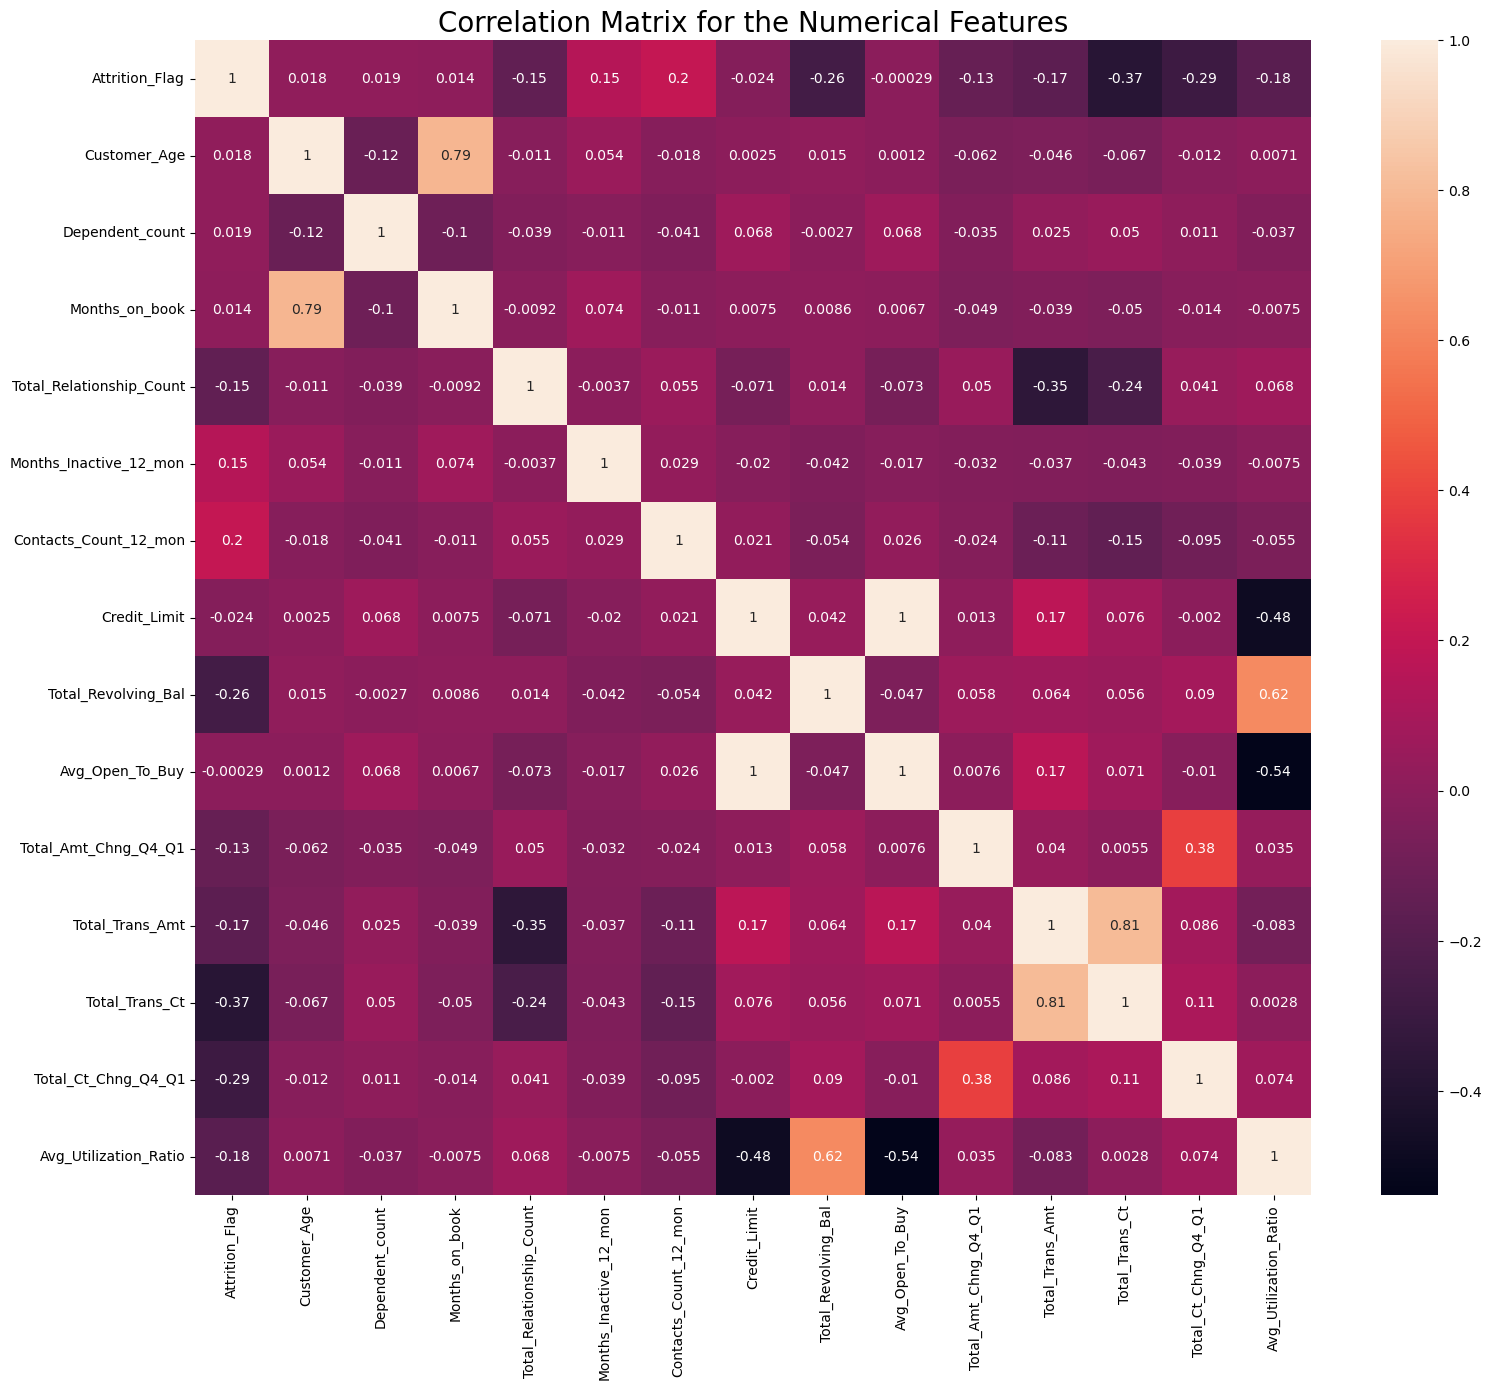

In [16]:
plt.figure(figsize=(18,15))
sns.heatmap(bank_data.corr(),annot=True)
plt.title("Correlation Matrix for the Numerical Features",size=20);


1. `Avg_Open_To_Buy` and `Credit_Limite` are perfect positive correlated. This is not surprise. According to the meaning of the columns,`Credit_Limite`=`Total_Revolving_Bal`+`Avg_Open_To_Buy`, `Avg_Utilization_Ratio`=`Total_Revolving_Bal`/`Credit_Limite`. This is also can explain why `Total_Revolving_Bal` and `Avg_Utilization_Ratio` show highly positive correlated,`Avg_Open_To_Buy` and `Avg_Utilization_Ratio` shows a high negative correlation.
2. `Customer_Age` and `Months_on_book`,`Total_Trans_Amt` and `Total_Trans_Ct` are higly positive correlated. These make sense. The older the customer is, the longer he or she has to deal with the bank. The more transfers you have made in the past year, the larger the transfer amount will be.

As `Attrition_Flag` is our target feature, we would like to know feature correlation with the target feature.

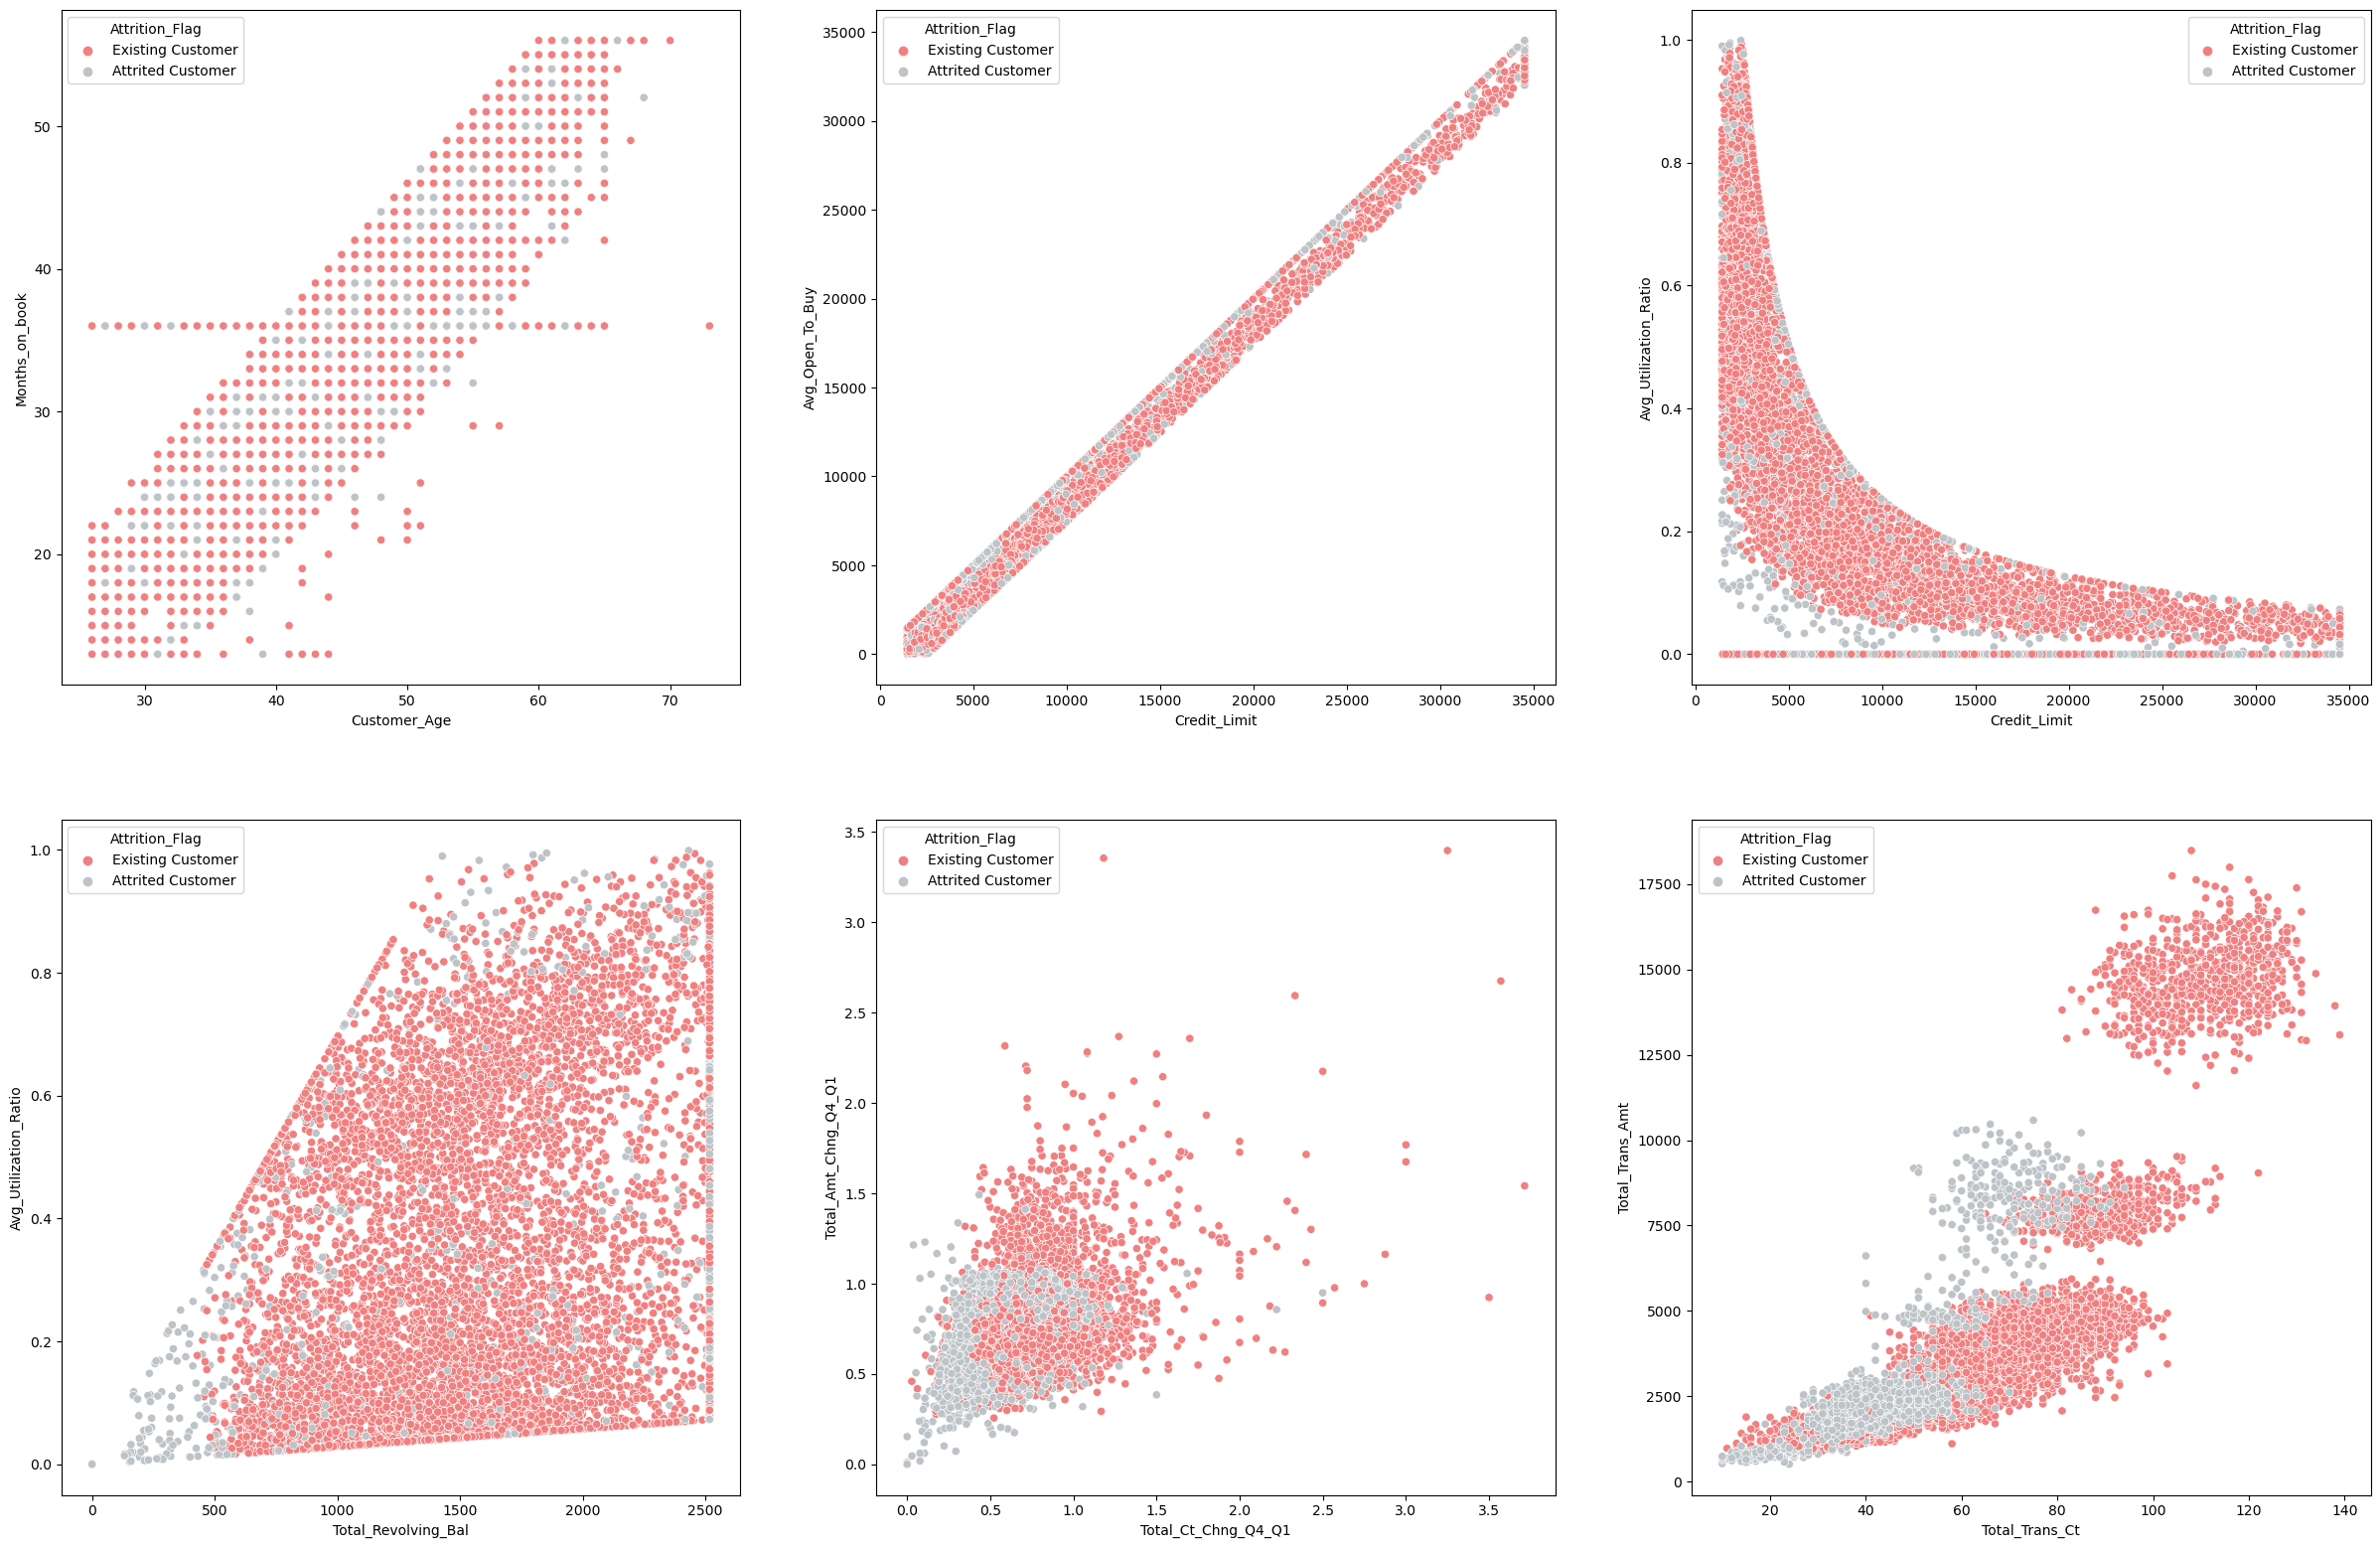

In [26]:
plt.figure(figsize=(30,30))
plt.subplot(3,3,1)
sns.scatterplot(data=bank_data, 
            x="Customer_Age", 
            y="Months_on_book", 
            hue="Attrition_Flag",palette=['#F08080','#BDC3C7']);
plt.subplot(3,3,2)
sns.scatterplot(data=bank_data, 
            x="Credit_Limit", 
            y="Avg_Open_To_Buy", 
            hue="Attrition_Flag",palette=['#F08080','#BDC3C7']);
plt.subplot(3,3,3)
sns.scatterplot(data=bank_data, 
            x="Credit_Limit", 
            y="Avg_Utilization_Ratio", 
            hue="Attrition_Flag",palette=['#F08080','#BDC3C7']);
plt.subplot(3,3,4)
sns.scatterplot(data=bank_data, 
            x="Total_Revolving_Bal", 
            y="Avg_Utilization_Ratio", 
            hue="Attrition_Flag",palette=['#F08080','#BDC3C7']);

plt.subplot(3,3,5)
sns.scatterplot(data=bank_data, 
            x="Total_Ct_Chng_Q4_Q1", 
            y="Total_Amt_Chng_Q4_Q1", 
            hue="Attrition_Flag",palette=['#F08080','#BDC3C7']);
plt.subplot(3,3,6)
sns.scatterplot(data=bank_data, 
            x="Total_Trans_Ct", 
            y="Total_Trans_Amt", 
            hue="Attrition_Flag",palette=['#F08080','#BDC3C7']);

1. As mentioned above, customer age and their period of relationship with bank is strongly positive related, but this relationship doesnt show obvious difference between churned or retained customers.
2. Other pairs of features all somehow reflect the activity of the account. We can see that credit limit is positively correlated with average open to buy and negatively correlated with average untilization ratio which means as the credit limit card amount increases, customers do not spend more, and credit card utilization decreases. It is evident that our customers are still restrained in their spending.
3. When it comes to our target feature attrition flag, we can easily notice that churned customers tend to be have lower credit limit, lower utilization rate, less transcation activities and lower transcation amount. From this we can conclude that，When a customer's account is inactive, we should be careful that the customer may churn later.

## Save the Data

In [22]:
datapath = '../data'
save_file(bank_data, 'bank_data_features.csv', datapath)

Writing file.  "../data\bank_data_features.csv"
